# Building a Multi-layer Perceptron
## MLPClassifier training using Backpropagation

### Import Basic Libraries

In [3]:
import numpy as np 
import pandas as pd
import csv

from sklearn.neural_network import MLPClassifier

### Import and Split Data

In [5]:
data = pd.read_csv('../Data_sets/Master_cleaned.csv')
data

,Product,Brand,Ingredients,Price,Skin_Type,Combination,Dry,Normal,Oily,Sensitive,...,num_of_Emollients,num_of_Hydration,num_of_Skin-Restoring,num_of_Plant Extracts,num_of_Preservatives,num_of_Skin-Softening,num_of_Sensitizing,num_of_Skin-Replenishing,top_3,top3_category_list
0,#InstantDetox Facial Mask,Biobelle,"Water, Butylene Glycol, Glycerin, Trehalose, H...",3.99,['Oily'],0,0,0,1,0,...,0,0,0,0,0,0,0,1,"['Butylene Glycol', 'Glycerin', 'Trehalose']","['Texture Enhancer', 'Skin-Replenishing, Skin-..."
1,#Peachy Facial Mask,Biobelle,"Water, Methylpropanediol, Butylene Glycol, Gly...",3.99,['Dry'],0,1,0,0,0,...,0,0,0,0,0,0,0,1,"['Methylpropanediol', 'Butylene Glycol', 'Glyc...","[None, 'Texture Enhancer', 'Skin-Replenishing,..."
2,#Rise&Shine Facial Mask,Biobelle,"Water, Glycerin, Butylene Glycol, Triethylhexa...",3.99,['Combination'],1,0,0,0,0,...,0,0,0,0,0,0,0,1,"['Glycerin', 'Butylene Glycol', 'Triethylhexan...","['Skin-Replenishing, Skin-Restoring', 'Texture..."
3,#RoséAllDay Facial Mask,Biobelle,"Water, Methylpropanediol, Glycerin, Propanedio...",3.99,['Combination'],1,0,0,0,0,...,0,0,0,1,2,0,0,2,"['Methylpropanediol', 'Glycerin', 'Propanediol']","[None, 'Skin-Replenishing, Skin-Restoring', None]"
4,#VitaminSea Facial Mask,Biobelle,"Water, Butylene Glycol, Glycerin, Hydroxyaceto...",3.99,['Dry'],0,1,0,0,0,...,0,0,0,1,0,0,0,1,"['Butylene Glycol', 'Glycerin', 'Hydroxyacetop...","['Texture Enhancer', 'Skin-Replenishing, Skin-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Youthful Vitamin C Fresh Radiance Essence,No7,"Aqua (Water), Butylene Glycol, Glycerin, Gluco...",24.99,"['Combination', 'Dry', 'Normal', 'Oily']",1,1,1,1,0,...,0,0,0,2,3,0,0,2,"['Butylene Glycol', 'Glycerin', 'Gluconolactone']","['Texture Enhancer', 'Skin-Replenishing, Skin-..."
2020,Yuza Sorbet Day Cream,Erborian,"Aqua/Water, Cyclomethicone, Glycerin, Nylon-12...",48.00,"['Combination', 'Dry', 'Normal', 'Oily', 'Sens...",1,1,1,1,1,...,1,0,0,1,1,0,0,1,"['Cyclomethicone', 'Glycerin', 'Nylon-12']","['Emollients', 'Skin-Replenishing, Skin-Restor..."
2021,Yuza Sorbet Night Treatment,Erborian,"Aqua/Water, Cyclomethicone, Glycerin, Cetearyl...",55.00,"['Combination', 'Dry', 'Normal', 'Oily', 'Sens...",1,1,1,1,1,...,2,0,0,0,0,0,0,1,"['Cyclomethicone', 'Glycerin', 'Cetearyl Alcoh...","['Emollients', 'Skin-Replenishing, Skin-Restor..."
2022,Yuzu Overnight Moisture Mask,Earth Therapeutics,"Water (Aqua), Propanediol, Glycerin, Hydrogena...",7.00,"['Combination', 'Dry', 'Normal', 'Sensitive']",1,1,1,0,1,...,2,0,0,1,0,0,0,1,"['Propanediol', 'Glycerin', 'Hydrogenated Poly...","[None, 'Skin-Replenishing, Skin-Restoring', None]"


### Split Data

In [8]:
from sklearn.model_selection import train_test_split

# remove classes with less than 4 observations 
data = data[data.Skin_Type != "['Oily', 'Sensitive']"]
data = data[data.Skin_Type != "['Dry', 'Normal', 'Oily']"]
data = data[data.Skin_Type != "['Dry', 'Oily']"]
data = data[data.Skin_Type != "['Dry', 'Normal', 'Oily', 'Sensitive']"]
data = data[data.Skin_Type != "['Combination', 'Dry', 'Oily', 'Sensitive']"]
data = data[data.Skin_Type != "['Normal', 'Oily']"]

X = data[data.columns[17:28]].values
y = data.Skin_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=211)

### Scaling Data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Building MLPClassifier

In [39]:
clf = MLPClassifier(solver='sgd', alpha=1, random_state=2599)

In [40]:
clf.fit(X_train,y_train)

C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1, random_state=2599, solver='sgd')

AttributeError: 'list' object has no attribute 'show'

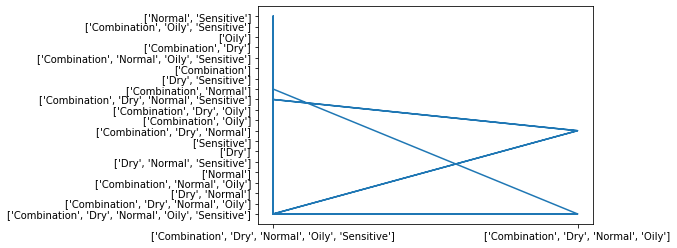

In [42]:
import matplotlib.pyplot as plt
accuracy = plt.plot(clf.predict(X_test), y_test)
accuracy.show()